In [ ]:
from urllib.request import urlretrieve
import zipfile
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR

Getting the dataset

In [ ]:
urlretrieve("http://files.grouplens.org/datasets/movielens/ml-100k.zip", "movielens.zip")
zip_ref = zipfile.ZipFile('movielens.zip', "r")
zip_ref.extractall()

Information about the dataset

In [ ]:
info_list = zip_ref.read('ml-100k/u.info').decode('utf-8').split()
no_of_reviewers = int(info_list[0])
print ('no of reviewers =', no_of_reviewers)
no_of_movies = int(info_list[2])
print ('no of movies =', no_of_movies)
no_of_samples = int(info_list[4]) 
print ('no of samples =', no_of_samples)

no of reviewers = 943
no of movies = 1682
no of samples = 100000


Forming training set and testing set

In [ ]:
Training_set = np.zeros((no_of_reviewers, no_of_movies))
Testing_set = np.zeros((no_of_reviewers, no_of_movies))

Dividing into TRAINING AND TESTING sets

In [186]:
read_file= csv.reader(open('ml-100k/u.data'))
kk = 0
training_set1 = []
testing_set1=[]
k =0
for row in read_file:
    r = row[0].split('\t')
    ##print (r)
    i, j, T = int(r[0]), int(r[1]), int(r[2])
    ##print (hello)
    ##print (i)
    ##print (j)
    ##print(r)
    if (kk<8000):
        ##print ('1')
        training_set1.append([i, j, T])
        Training_set[i - 1][j - 1] = T
        ##print (Training_set)
        ##kk += 1
    else:
        ##print(kk)
        Testing_set[i - 1][j - 1] = T
        testing_set1.append([i,j, T])
        kk += 1

**LOW RANK APPROXIAMTION**

In [187]:
def low_rank_A(matrix,k_val):
    ##print (k_val)
    u, d, v = np.linalg.svd(matrix, full_matrices=1)
    output = np.zeros((len(u), len(v)))
    ##print (output)
    for k in range(k_val):
        ##print(k)
        output += d[k] * np.outer(u.T[k], v[k])
        ##print (output)
    return output

In [188]:
val = low_rank_A(Training_set, k_val = 10)

In [189]:
val[:10]

array([[ 4.25204675e+00,  2.08644700e+00,  1.29105941e+00, ...,
        -8.39539471e-03,  1.98410372e-02,  5.78772121e-02],
       [ 1.85298728e+00, -1.07304097e-01,  1.63140719e-01, ...,
         1.05689177e-02,  2.40161236e-04, -1.41019252e-04],
       [-1.16700091e-01, -1.98725527e-02,  9.20469305e-02, ...,
         1.96975747e-02, -3.17732077e-03, -1.03339447e-02],
       ...,
       [ 1.02558324e+00,  1.53129352e+00, -1.34609958e-01, ...,
         3.90024109e-05,  2.59707965e-02,  1.51875367e-02],
       [ 6.70576397e-01, -8.89016896e-02,  1.71954548e-02, ...,
         2.07656091e-03, -8.44700967e-04, -3.48068084e-03],
       [ 1.30696317e+00, -2.70326629e-02,  2.90402198e-01, ...,
        -1.07558466e-03,  6.96509661e-03,  6.11549947e-03]])

ERRORS

In [ ]:
def e_low_rank(k, Test):
  ##print(k)
  val = low_rank_A(Training_set, k_val = k)
  error = 0
  for i, j, T in Test:
    ##print (T)
    error += (T - val[int(i-1)][int(j-1)])**2
  return error

In [ ]:
error_val = []
range_val = list(range(101))
for i in range_val:
  ##print (i)
  error_val.append(e_low_rank(i,testing_set1))

Ploting 

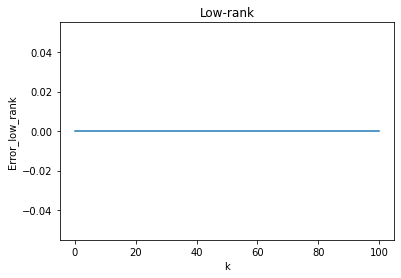

In [ ]:
plt.title ('Low-rank')
plt.plot(range_val, error_val)
plt.xlabel("k")
plt.ylabel("Error_low_rank")
plt.show()

In [ ]:
error_val.index(min(error_val))

0

**Baseline Algorithm**

In [ ]:
avg_rating = []
avg_rt_mov = []
avg = []
for  i in range(len(Training_set)):
  ##print (i)
  ##avg.append (sum(Training_set[:,i])/943)
  avg_rating.append(sum(Training_set[i])/1682)
    
for j in range(len(Training_set[0])):
  ##print(j)
  avg_rt_mov.append(sum(Training_set[:,j])/943)
  ##avg.append(sum(Training_set[j])/943)
avg_rating,avg_rt_mov = np.array(avg_rating),np.array(avg_rt_mov)

In [ ]:
temp1 = []
temp2 = []
##TemP = []
for i, j, T in training_set1:
  ##print (j)
  temp1.append([avg_rating[i-1], avg_rt_mov[j-1]])
  ##TemP.append(Training_set[j-1][i-1])
  temp2.append(Training_set[i-1][j-1])

temp1=np.array(temp1)
##print(temp1)
temp2=np.array(temp2)

liner_reg = LR(fit_intercept=False)
liner_reg.fit(temp1,temp2)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

Alpha and beta

In [ ]:
a, b = liner_reg.coef_
## print(a)
## print(b)
base=[]
base_err = 0
for i,j, T in training_set1:
  tt1 = a*avg_rating[i-1]
  tt2 = b*avg_rt_mov[j-1]
  tt = tt1+tt2
  ##printf (tt)
  base.append([i,j,tt])
  base_err += (tt-Training_set[i-1][j-1])**2
  ##print (base_err)
base=np.array(base)

In [ ]:
error_val1 = []
range_val1 = list(range(101))
for i in range_val1:
  ##print(i)
  error_val1.append(e_low_rank(i, base))

error

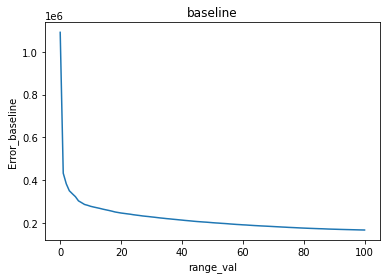

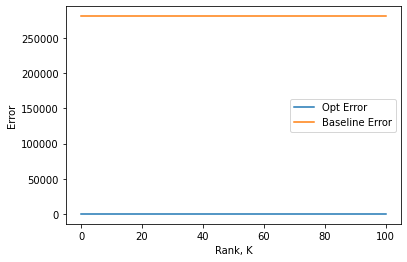

In [ ]:
plt.title ('baseline')
plt.plot(range_val1, error_val1)
plt.xlabel("range_val")
plt.ylabel("Error_baseline")
plt.show()

plt.plot(range_val, error_val, label = "Opt Error")
plt.xlabel("Rank, K")
plt.ylabel("Error")
plt.plot(range_val1, [base_err]*101, label = 'Baseline Error')
plt.legend()
plt.show()